In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies=pd.read_csv("mymovies.csv")
rating=pd.read_csv("myratings.csv")
links=pd.read_csv("mylinks.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
print(movies.shape)
print(rating.shape)
print(links.shape)

(87585, 3)
(32000204, 4)
(87585, 3)


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [8]:
df = rating.merge(movies, on='movieId')

In [9]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,3,17,5.0,1084485217,Sense and Sensibility (1995),Drama|Romance
2,15,17,4.5,1289858271,Sense and Sensibility (1995),Drama|Romance
3,28,17,4.0,961513829,Sense and Sensibility (1995),Drama|Romance
4,29,17,4.0,845056111,Sense and Sensibility (1995),Drama|Romance


In [10]:
df = df.drop(columns=['timestamp'])

In [11]:
df.head()

,userId,movieId,rating,title,genres
0,1,17,4.0,Sense and Sensibility (1995),Drama|Romance
1,3,17,5.0,Sense and Sensibility (1995),Drama|Romance
2,15,17,4.5,Sense and Sensibility (1995),Drama|Romance
3,28,17,4.0,Sense and Sensibility (1995),Drama|Romance
4,29,17,4.0,Sense and Sensibility (1995),Drama|Romance


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
 3   title    object 
 4   genres   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [13]:
df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,32000204.0,100278.506411,57949.046233,1.0,50053.0,100297.0,150451.0,200948.0
movieId,32000204.0,29318.610122,50958.160880,1.0,1233.0,3452.0,44199.0,292757.0
rating,32000204.0,3.540396,1.058986,0.5,3.0,3.5,4.0,5.0


In [16]:
df['year'] = df['title'].str.extract(r'\((\d{4})\)')
df['year'] = df['year'].astype('Int64')

In [17]:
df['title'] = df['title'].str.replace(r'\s*\(\d{4}\)\s*', '', regex=True)

In [18]:
df.head()

,userId,movieId,rating,title,genres,year
0,1,17,4.0,Sense and Sensibility,Drama|Romance,1995
1,3,17,5.0,Sense and Sensibility,Drama|Romance,1995
2,15,17,4.5,Sense and Sensibility,Drama|Romance,1995
3,28,17,4.0,Sense and Sensibility,Drama|Romance,1995
4,29,17,4.0,Sense and Sensibility,Drama|Romance,1995


In [19]:
avg_ratings = df.groupby('title')['rating'].mean().reset_index().rename(columns={'rating': 'avg_rating'})

avg=pd.DataFrame(avg_ratings).sort_values('avg_rating',ascending=False)

In [20]:
avg

,title,avg_rating
48055,Pica-Don,5.0
32402,Jeca Tatu,5.0
16838,Dear Viola,5.0
1536,A Fine Step,5.0
32339,Jawani Phir Nahi Ani 2,5.0
...,...,...
15490,Cup Final,0.5
65351,The Lion Standing in the Wind,0.5
65354,The Lion in Winter,0.5
67051,The Prayer Box,0.5


In [21]:
cnt_ratings = df.groupby('title')['rating'].count().reset_index().rename(columns={'rating': 'count_rating'})

cnt=pd.DataFrame(cnt_ratings).sort_values('count_rating',ascending=False)

In [22]:
cnt.head(10)

,title,count_rating
54702,"Shawshank Redemption, The",102929
23381,Forrest Gump,100296
49710,Pulp Fiction,98409
40033,"Matrix, The",93808
55281,"Silence of the Lambs, The",90330
57498,Star Wars: Episode IV - A New Hope,85010
22282,Fight Club,77332
33225,Jurassic Park,75233
53443,Schindler's List,73849
37577,"Lord of the Rings: The Fellowship of the Ring,...",73122


In [23]:
popularite=avg.merge(cnt,on='title')

In [24]:
popularite.head(10)

,title,avg_rating,count_rating
0,Pica-Don,5.0,1
1,Jeca Tatu,5.0,1
2,Dear Viola,5.0,1
3,A Fine Step,5.0,1
4,Jawani Phir Nahi Ani 2,5.0,1
5,Overcome,5.0,1
6,The Monster of Phantom Lake,5.0,1
7,Over the Moon in Love,5.0,1
8,Farewell to Dream,5.0,1
9,Jealousy Is My Middle Name,5.0,2


In [25]:
v=popularite["count_rating"]
R=popularite["avg_rating"]
m=v.quantile(0.90)
c=R.mean()
popularite['w_score']=((v*R) + (m*c)) / (v+m)

In [26]:
popularite["count_rating"].describe()

count     78282.000000
mean        408.781125
std        2705.763595
min           1.000000
25%           2.000000
50%           5.000000
75%          28.000000
max      102929.000000
Name: count_rating, dtype: float64

In [27]:
pop_sort=popularite.sort_values('w_score',ascending=False)

In [28]:
pop_sort

,title,avg_rating,count_rating,w_score
2325,"Shawshank Redemption, The",4.404614,102929,4.400820
2317,Planet Earth,4.441904,2952,4.317540
2455,"Godfather, The",4.317030,66440,4.311530
2321,Band of Brothers,4.426539,2811,4.297900
2314,Planet Earth II,4.446830,1956,4.266476
...,...,...,...,...
75039,Epic Movie,1.463137,1492,1.708465
75570,Son of the Mask,1.220553,832,1.672603
75573,Gigli,1.204057,838,1.657826
73625,Battlefield Earth,1.567265,5010,1.643944


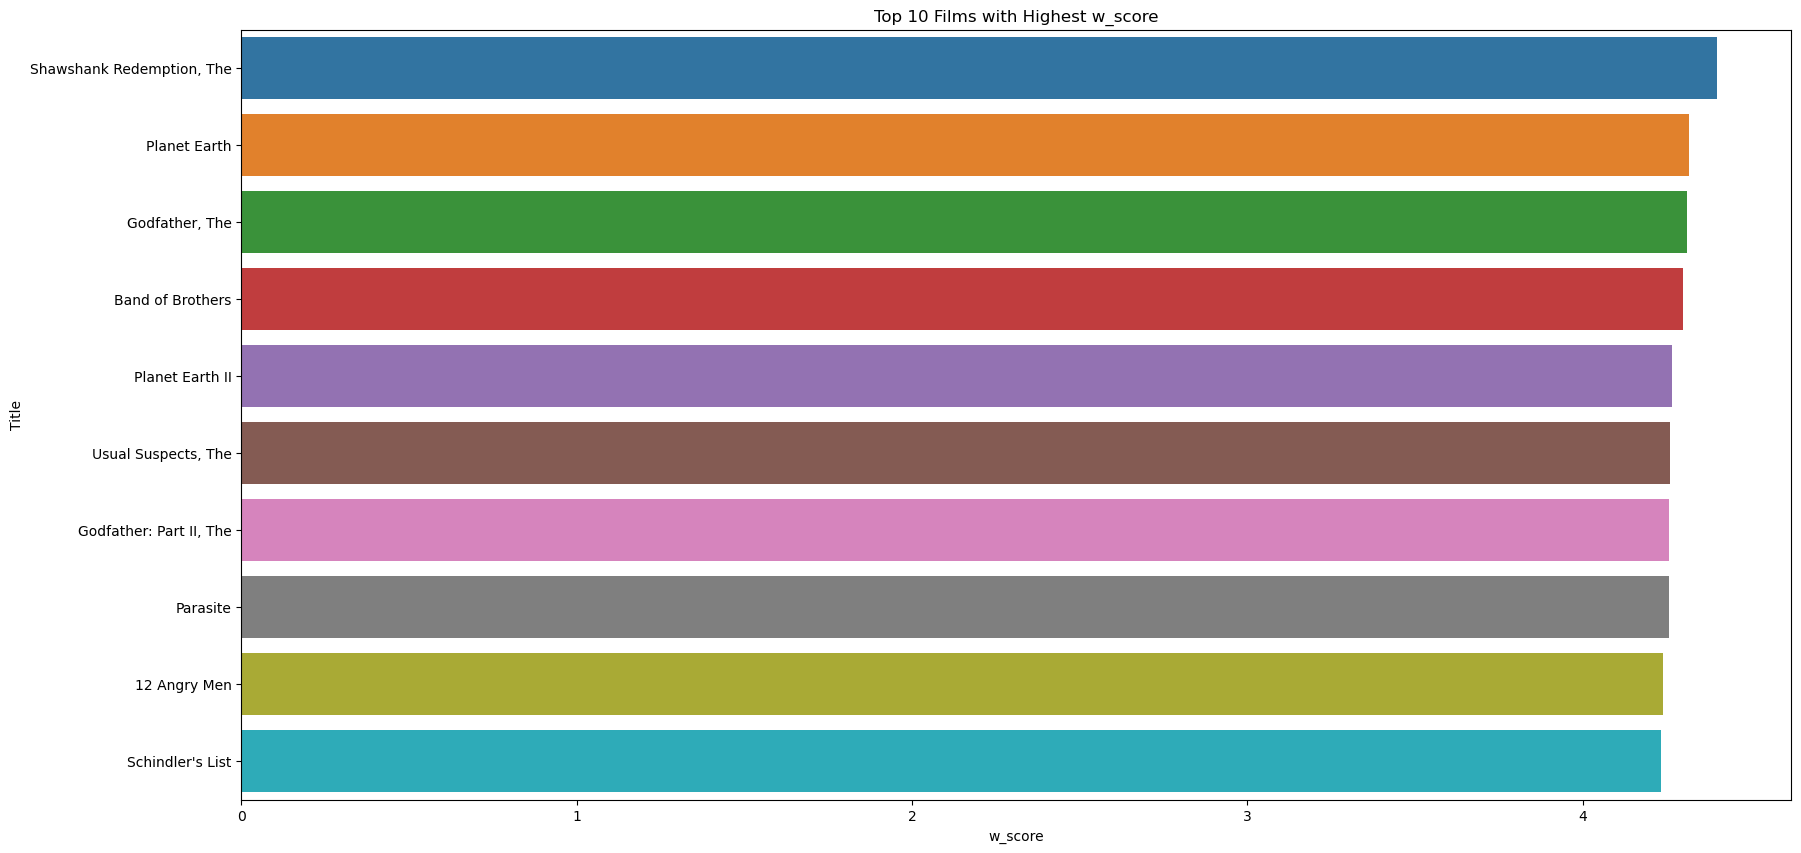

In [29]:
top_10_books = pop_sort.head(10)

plt.figure(figsize=(20, 10))
sns.barplot(x='w_score', y='title', data=top_10_books)
plt.xlabel('w_score')
plt.ylabel('Title')
plt.title('Top 10 Films with Highest w_score')
plt.show()

In [30]:
new_df=df[df['userId'].map(df['userId'].value_counts()) > 200]  

In [31]:
new_df

,userId,movieId,rating,title,genres,year
3,28,17,4.0,Sense and Sensibility,Drama|Romance,1995
10,59,17,4.0,Sense and Sensibility,Drama|Romance,1995
12,78,17,5.0,Sense and Sensibility,Drama|Romance,1995
14,86,17,4.0,Sense and Sensibility,Drama|Romance,1995
16,109,17,4.5,Sense and Sensibility,Drama|Romance,1995
...,...,...,...,...,...,...
32000196,200349,229167,4.0,Protect and Serve,Drama,2007
32000197,200432,138948,1.0,Aladdin and the Death Lamp,Adventure|Fantasy|Horror,2012
32000198,200443,121961,2.5,The Young Racers,Action|Drama,1963
32000199,200443,137537,2.5,Psycho a Go-Go,Crime|Sci-Fi,1965


In [32]:
new_df.shape

(20936352, 6)

In [33]:
new_df.isna().sum()

userId         0
movieId        0
rating         0
title          0
genres         0
year       27506
dtype: int64

In [34]:
new_df['title'].nunique()

77144

In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20936352 entries, 3 to 32000203
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
 3   title    object 
 4   genres   object 
 5   year     Int64  
dtypes: Int64(1), float64(1), int64(2), object(2)
memory usage: 1.1+ GB


In [36]:
new_df['rating'] = new_df['rating'].astype('float16')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\836104031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['rating'] = new_df['rating'].astype('float16')


In [42]:
new_df['userId'] = new_df['userId'].astype('int16')
new_df['movieId'] = new_df['movieId'].astype('int16')
new_df['year'] = new_df['year'].astype('int16')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\70877338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['userId'] = new_df['userId'].astype('int16')
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\70877338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['movieId'] = new_df['movieId'].astype('int16')
C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\70877338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [43]:
new_df['year'].isna().sum()

0

In [41]:
new_df['year'] = new_df['year'].fillna(1980)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13980\4290305958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] = new_df['year'].fillna(1980)


In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20936352 entries, 3 to 32000203
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int16  
 1   movieId  int16  
 2   rating   float16
 3   title    object 
 4   genres   object 
 5   year     int16  
dtypes: float16(1), int16(3), object(2)
memory usage: 638.9+ MB


In [45]:
%%time
users_pivot=new_df[:20500000].pivot_table(index=["userId"],columns=["title"],values="rating")
users_pivot.fillna(0,inplace=True)

CPU times: total: 33.3 s
Wall time: 33.3 s


In [46]:
users_pivot.head()

title,"""Great Performances"" Cats",#1 Cheerleader Camp,#Alive,#Horror,$5 a Day,'71,'77,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,...,Ölümlü Dünya,İtirazım Var,Бабушка лёгкого поведения,Мартынко,Он вам не Димон,Приключения Домовёнка,Снежные дорожки,Я худею,キサラギ,貞子3D
userId,,,,,,,,,,,,,,,,,,,,,
-32767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-32765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-32762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-32761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-32759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
def same_films(film):
    users_vote_film=users_pivot[film]
    similar_with=users_pivot.corrwith(users_vote_film)
    similar_with = pd.DataFrame(similar_with, columns=['correlation'])
    print(similar_with)
    df=similar_with.sort_values('correlation',ascending=False).head(10)
    print(df)
    df_sort=df[df['correlation']>0.8]
    return df_sort

In [48]:
same_films('Toy Story')

                           correlation
title                                 
"Great Performances" Cats     0.020100
#1 Cheerleader Camp           0.011433
#Alive                        0.011549
#Horror                       0.007850
$5 a Day                      0.009934
...                                ...
Приключения Домовёнка         0.001799
Снежные дорожки              -0.000850
Я худею                       0.000076
キサラギ                          0.002041
貞子3D                          0.001120

[21694 rows x 1 columns]
                      correlation
title                            
Toy Story                1.000000
Toy Story 2              0.556630
Lion King, The           0.415962
Aladdin                  0.407815
Bug's Life, A            0.402350
Monsters, Inc.           0.366801
Beauty and the Beast     0.347580
Finding Nemo             0.337419
Jurassic Park            0.328965
Shrek                    0.323400


,correlation
title,
Toy Story,1.0


In [49]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd


film_df_matrix = csr_matrix(users_pivot.values.T)

def find_similar_films(film_name, num_neighbors=10):
    # Initialize the NearestNeighbors model
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(film_df_matrix)
    
    # Find the index of the input book
    film_index = users_pivot.columns.get_loc(film_name)
    
    # Query the nearest neighbors
    distances, indices = model_knn.kneighbors(film_df_matrix[film_index], n_neighbors=num_neighbors+1)
    # Exclude the first index (which is the input book itself)
    similar_indices = indices[0][1:]
    
    # Get the names of similar books based on indices
    list_similar_films = [users_pivot.columns[idx] for idx in similar_indices]
    similar_films = pd.DataFrame({"Похожие фильмы":list_similar_films})
    return similar_films



In [50]:
# Example usage
input_film = "Toy Story"  
find_similar_films(input_film)

,Похожие фильмы
0,Forrest Gump
1,Back to the Future
2,Jurassic Park
3,Star Wars: Episode IV - A New Hope
4,Toy Story 2
5,Star Wars: Episode V - The Empire Strikes Back
6,"Matrix, The"
7,Raiders of the Lost Ark (Indiana Jones and the...
8,Star Wars: Episode VI - Return of the Jedi
9,"Lion King, The"


In [32]:
# pip install scikit-surprise

In [52]:
%%time
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Подготавливаем данные для Surprise
reader = Reader(rating_scale=(0.5, 5))  # укажи реальный диапазон рейтингов
data = Dataset.load_from_df(new_df[['userId', 'title', 'rating']], reader)

# Делим на train/test
trainset, testset = train_test_split(data, test_size=0.2)

# Обучаем модель (например, SVD — очень популярная)
model = SVD(n_factors=100, n_epochs=20, random_state=42)
model.fit(trainset)

# Предсказание
pred = model.test(testset)

# Оценка качества
from surprise import accuracy
accuracy.rmse(pred)

RMSE: 0.7690
CPU times: total: 4min 56s
Wall time: 4min 57s


0.7690096158527081

In [57]:
predictions_df = pd.DataFrame({
    'userId': [p.uid for p in pred],
    'title': [p.iid for p in pred],
    'real_rating': [p.r_ui for p in pred],
    'predicted_rating': [p.est for p in pred]
})

In [59]:
predictions_df.sample(10)

,userId,title,real_rating,predicted_rating
440196,25633,"Adventures of Priscilla, Queen of the Desert, The",4.0,3.858353
2090676,-21220,Scarface,3.0,3.805396
2864242,1743,"Pan's Labyrinth (Laberinto del fauno, El)",4.5,3.968531
1596046,-2311,Romancing the Stone,4.0,2.984216
3620225,15074,House Party,3.0,2.820422
2940931,26037,Aliens,4.5,3.832931
1127891,-27147,Seconds,3.0,3.448725
2195440,26585,"Sweetest Thing, The",2.0,2.474253
2094411,-9094,Earthquake,3.0,2.877227
234027,14281,Déjà Vu (Deja Vu),3.5,3.952547


In [55]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(predictions_df['real_rating'], predictions_df['predicted_rating'])
print(f"MAE: {mae:.4f}")

MAE: 0.5825
